# Introduction: Virus, Bacteria, Protozoa, Algae or Nematode

This is based on the [FastAI Practical Deep Learning 2022 course - Lesson 1](https://course.fast.ai/Lessons/lesson1.html) (Part 1) and [FastAI Practical Deep Learning 2022 course - Lesson 2](https://course.fast.ai/Lessons/lesson2.html) (Parts 2 and 3). It was also informed by [this more up-to-date video](https://youtu.be/rQM0pJvgiGY) applying the tools and concepts in 2025.

In my own version of this workflow, the goal is to fine-tune the resnet18 image classification model to classify microscopy images of viruses, bacteria, protozoa, algae and nematodes from the DuckDuckGo image search (see examples of [virus](https://duckduckgo.com/?q=virus+microscopic+photo&iar=images&t=h_), [bacteria](https://duckduckgo.com/?q=bacteria+microscopic+photo&iar=images&t=h_), [protozoa](https://duckduckgo.com/?q=protozoa+microscopic+photo&iar=images&t=h_), [algae](https://duckduckgo.com/?q=algae+microscopic+photo&iar=images&t=h_), and [nematode](https://duckduckgo.com/?q=nematode+microscopic+photo&iar=images&t=h_)). This model is used to clean the input images for model training. The tuned model is then deployed via Hugging Face Spaces (Gradio framework) and GitHub pages (JavaScript).

For more information about the tools, see:
- [The FastAI documentation](https://docs.fast.ai/)
- [Gradio + HuggingFace Spaces: A Tutorial by Tanishq Abraham](https://www.tanishq.ai/blog/posts/2021-11-16-gradio-huggingface.html)
- [Hugging Face Spaces](https://huggingface.co/spaces)
- Cloud Notebook Servers: [Kaggle](https://kaggle.com/code/audlang) and [Google CoLab](https://colab.research.google.com/)

Other useful resources:
- [Free Notebook version of the book linked to the course - Chapter 1](https://github.com/fastai/fastbook/blob/master/01_intro.ipynb)
- [FastAI Practical Deep Learning 2022 course - Lesson 1](https://course.fast.ai/Lessons/lesson1.html), [Lesson 2](https://course.fast.ai/Lessons/lesson2.html)
- [FastAI Forum for Lesson 1](https://forums.fast.ai/t/lesson-1-official-topic/95287) and [Forum for Lesson 2](https://forums.fast.ai/t/lesson-2-official-topic/96033)
- The main example notebook of Lesson 1: ['Is it a bird?' notebook](https://www.kaggle.com/code/audlang/is-it-a-bird-creating-a-model-from-your-own-data)

## The High-Level Process

1. Frame the problem. Consider what your goal/objective is.
    - What is the target?
    - Are you trying to predict something? Is that something a binary/multi-class classification? A numeric variable? Identifying something in an image?
    - How will it support the human users of the system?
2. Think about what actions you can take to meet that objective and what data you have (or can acquire) that can help
3. Build a model that you can use to determine the best actions to take to get the best results in terms of your objective.
    - Start with a simple model with basic parameter tuning/data cleaning. Use this model to iteratively improve the model and clean the data
4. Iteratively improve the model and input data. Identify any problem areas/edge cases that may cause issues. (Examine confusion matrix/highest loss examples)
5. Deploy model into production and test.

In [1]:
# Set up GPU socket
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# Install required libraries - ensure most up to date/compatible versions are installed
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install "numpy<2.0" "scipy" "fastai" 'ddgs' --upgrade -q
    #!pip install -Uqq fastai 'ddgs>=6.2'
print("Packages updated.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/

In [3]:
from fastai.vision.all import *

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

The basic steps we'll take are:

1. **Data Gathering**: Use DuckDuckGo to search for images of "virus microscopy photo", "bacteria microscopy photo", "protozoa microscopy photo", "algae microscopy photo", and "nematode microscopy photo"
2. **Fine-tune a pretrained neural network** to recognise these three groups
3. Try running this model on a picture of each class and **see if it works**.
4. View the **confusion matrix** and examples the model had **high loss** on (i.e. incorrect predictions made with high confidence, and correct predictions made with low confidence). Use this to **clean training data**
5. Implement **data augmentation** to make the model more robust to differences in images e.g. different angles, rotations, saturation, colour gradients.
6. **Retrain the model** using the cleaned and augmented image data
7. **Export the model weights** and upload to Hugging Face Spaces for hosting
8. Create a **demo web app in HF Spaces** using Gradio
9. Use the API to embed the application within a **web app** hosted on GitHub pages that is cleaner and has more flexible functionality.

# Part 1: Training and Evaluating the Model

## Step 1: Download images of microorganisms

In [4]:
from ddgs import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

Let's start by searching for a virus photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [5]:
urls = search_images('virus microscopy photo', max_images=1)
urls[0]

'https://static.vecteezy.com/system/resources/previews/030/740/469/large_2x/extreme-close-up-imagery-depicting-detailed-structures-of-viruses-under-microscope-photo.jpg'

...and then download a URL and take a look at it:

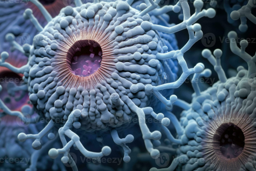

In [6]:
from fastdownload import download_url
dest = 'virus.jpg'
download_url(urls[0], dest, show_progress=False)

#from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "bacteria photos":

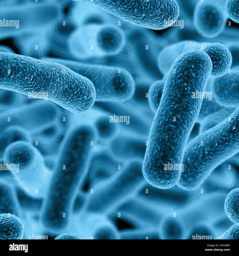

In [7]:
downloaded_valid = False
while downloaded_valid == False:
    try:
        download_url(search_images('bacteria microscopy photo', max_images=1)[0], 'bacteria.jpg', show_progress=False)
    except:
        continue
    downloaded_valid = True
Image.open('bacteria.jpg').to_thumb(256,256)

...and for "protozoa microscopy photo":

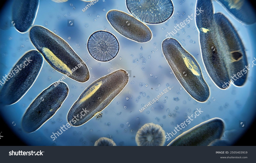

In [8]:
downloaded_valid = False
while downloaded_valid == False:
    try:
        download_url(search_images('protozoa microscopy photo', max_images=1)[0], 'protozoa.jpg', show_progress=False)
    except:
        continue
    downloaded_valid = True
Image.open('protozoa.jpg').to_thumb(256,256)

...and for "algae microscopy photo":

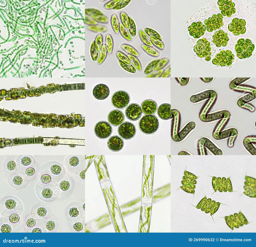

In [9]:
downloaded_valid = False
while downloaded_valid == False:
    try:
        download_url(search_images('algae microscopy photo', max_images=1)[0], 'algae.jpg', show_progress=False)
    except:
        continue
    downloaded_valid = True
Image.open('algae.jpg').to_thumb(256,256)

...and for "nematode microscopy photo":

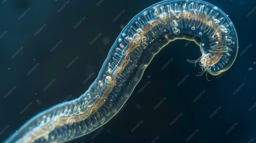

In [10]:
downloaded_valid = False
while downloaded_valid == False:
    try:
        download_url(search_images('nematode microscopy photo', max_images=1)[0], 'nematode.jpg', show_progress=False)
    except:
        continue
    downloaded_valid = True
Image.open('nematode.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab 200 examples of each image class, and save each group of photos to a folder bearing the name of the class (this will be the label used to train the model later):

In [11]:
searches = 'virus','bacteria','protozoa','algae','nematode'
path = Path('microorganism')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} microscopy photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

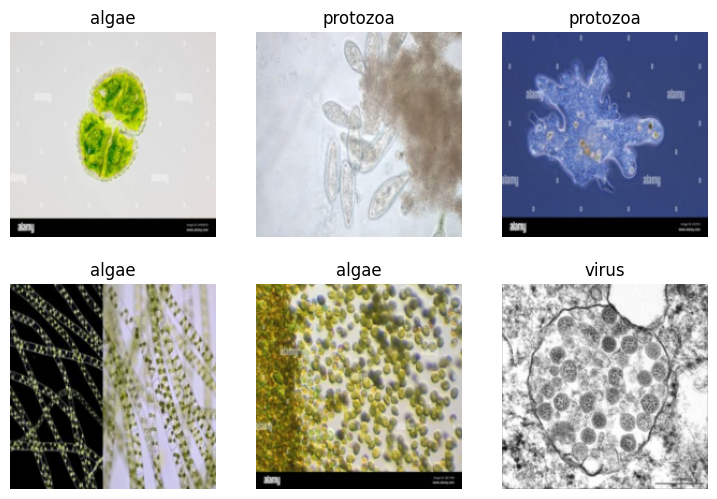

In [13]:
microorgs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)
dls=microorgs.dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 203MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.236685,0.866613,0.333333,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.042241,0.653401,0.269231,00:01
1,0.780772,0.517541,0.192308,00:01
2,0.585639,0.434806,0.141026,00:01
3,0.451207,0.377371,0.128205,00:01
4,0.363652,0.361562,0.141026,00:01
5,0.289034,0.366100,0.128205,00:01


"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use the model to predict labels

Let's use the fine-tuned model to predict the class of the example images we downloaded and displayed at the beginning: 

In [15]:
labels = ['algae', 'bacteria', 'nematode', 'protozoa', 'virus']

In [16]:
Image.open('virus.jpg').to_thumb(256,256)
is_virus,_,probs = learn.predict(PILImage.create('virus.jpg'))
print(f"This is a: {is_virus}.")
print(f"Probability it's a {is_virus}: {probs[4]:.4f}")

This is a: virus.
Probability it's a virus: 0.9900


In [17]:
Image.open('bacteria.jpg').to_thumb(256,256)
is_bacteria,_,probs = learn.predict(PILImage.create('bacteria.jpg'))
print(f"This is a: {is_bacteria}.")
print(f"Probability it's a {is_bacteria}: {probs[1]:.4f}")

This is a: bacteria.
Probability it's a bacteria: 0.9982


In [18]:
Image.open('algae.jpg').to_thumb(256,256)
is_algae,_,probs = learn.predict(PILImage.create('algae.jpg'))
print(f"This is a: {is_algae}.")
print(f"Probability it's a {is_algae}: {probs[0]:.4f}")

This is a: algae.
Probability it's a algae: 1.0000


In [19]:
Image.open('protozoa.jpg').to_thumb(256,256)
is_protozoa,_,probs = learn.predict(PILImage.create('protozoa.jpg'))
print(f"This is a: {is_protozoa}.")
print(f"Probability it's a {is_protozoa}: {probs[3]:.4f}")

This is a: protozoa.
Probability it's a protozoa: 0.9990


In [20]:
Image.open('nematode.jpg').to_thumb(256,256)
is_nematode,_,probs = learn.predict(PILImage.create('nematode.jpg'))
print(f"This is a: {is_nematode}.")
print(f"Probability it's a {is_nematode}: {probs[2]:.4f}")

This is a: nematode.
Probability it's a nematode: 0.9995


# Part 2: Improving the Model - Cleaning and Augmenting the Data

This section is informed by [Lesson 2 of the FastAI Practical Deep Learning course: Deployment](https://course.fast.ai/Lessons/lesson2.html) and [Chapter 2 of the accompanying book](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) (note: I used [Google CoLab](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) to read the book; recommended).

## Step 3.5: Diagnose Where the Model is Struggling

A confusion matrix shows the number of true/false positives/negatives for each target class. It can show whether the model is better at predicting some classes than others.  

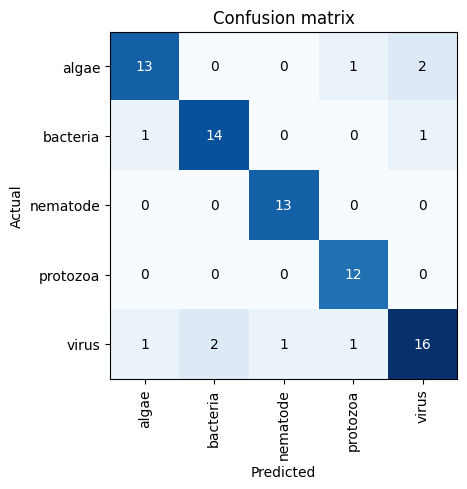

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Hmm, seems like the model is performing well for virus images, but occasionally gets confused between bacteria and nematodes. Let's take a look at the examples with the highest losses to see if we can get a better picture (pun totally intended!) of why.

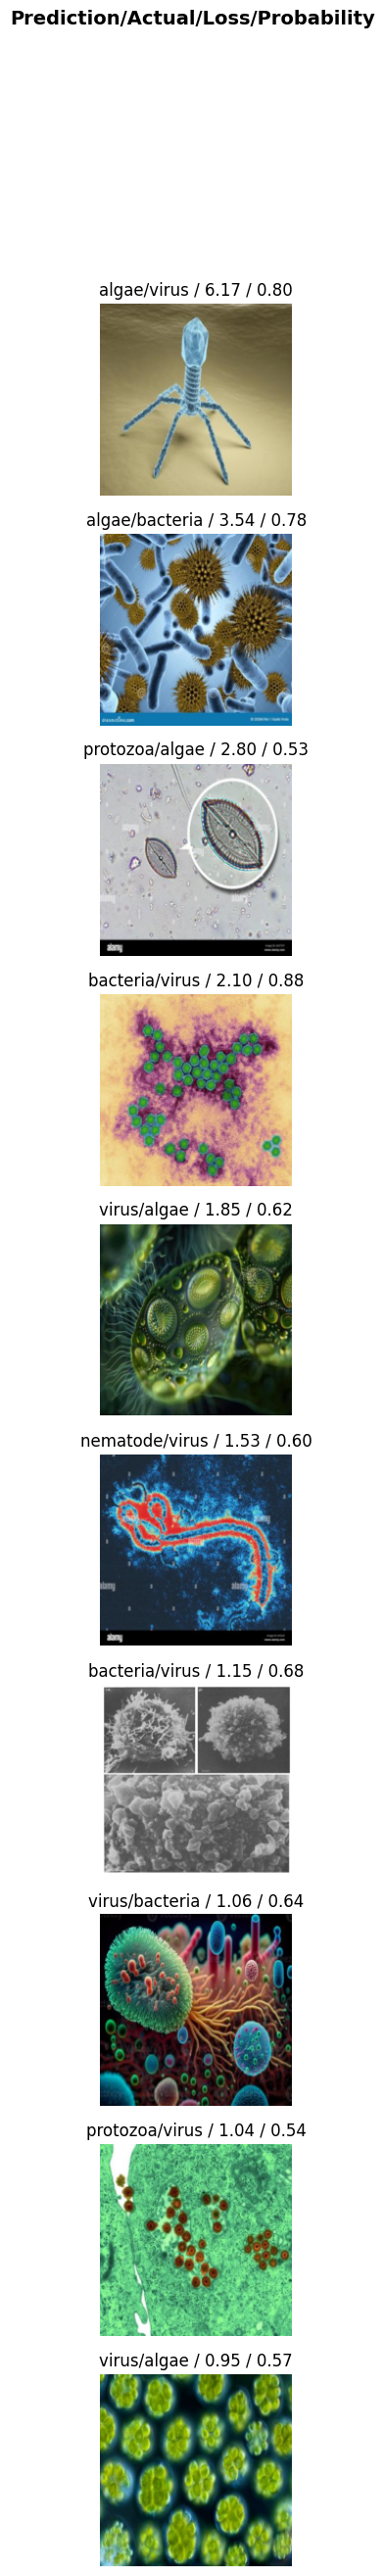

In [22]:
# Show examples with highest loss
interp.plot_top_losses(10, nrows=10)

Okay, so there appear to be a couple of reasons:
- Low resolution microscopy images are often misclassified - there may be a case for excluding these
- Cropped images/images from weird angles are often misclassified - try using data augmentation during training?
- There is a lot of variation amongst protozoans which often causes misclassification (tbh this can be an issue for human classification too) - this is why fungi were excluded from the classifier - mycelia were just too hard to distinguish from bacteria, nematodes and algae.
- Images with >1 type of microbe in them (e.g. some human cells + bacteria + viruses) are hard to classify for obvious reasons
- Images where the artist has taken some licence are also sometimes hard to classify, presumably because they are very distinct from the real microscopy photos in the data set.

Next steps:
- Attempt data augmentation on training images - see if this improves the model?
- Clean the input images - in particular, exclude low resolution microscopy slides

## Step 4: Data Augmentation

The input images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a mini-batch). To group them in a big array (usually called a tensor) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. Item transforms are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here.

By default Resize crops the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black) (`item_tfms=Resize(128, ResizeMethod.Squish)`), or squish/stretch them (`item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')`). 

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

In the code below, we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time. We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called **data augmentation**.

Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter.

In [23]:
microorgs = microorgs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = microorgs.dataloaders(path)

Now let's see if augmenting the data improves the model performance.

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.573674,1.649422,0.564103,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.577506,1.194975,0.448718,00:01
1,1.410315,0.853168,0.282051,00:01
2,1.206038,0.601185,0.205128,00:01
3,1.029369,0.523292,0.192308,00:01
4,0.878636,0.491023,0.205128,00:01
5,0.774136,0.476828,0.192308,00:01


...not much. But maybe cleaning the data might help too.

## Step 5: Data Cleaning

The intuitive approach to doing data cleaning is to do it before you train a model. But as you've seen previously in Step 3.5 Diagnose Where the Model is Struggling (confusion matrix and high-loss examples), a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

fastai includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling. 

*Note: the data cleaning code is commented out for now, because trying to run it seemed to have overwhelmed the CPU and froze the notebook execution.*

In [25]:
#from fastai.vision.widgets import *

In [26]:
#cleaner = ImageClassifierCleaner(learn)
#cleaner

`ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (unlink) all images selected for deletion, we would run:
```
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:
```
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

In [27]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Once we've cleaned up our data, we can retrain our model and see if its accuracy improves.

In [28]:
# Reload cleaned data into blocks
# microorgs = DataBlock(
#     blocks=(ImageBlock, CategoryBlock), 
#     get_items=get_image_files, 
#     splitter=RandomSplitter(valid_pct=0.2, seed=42),
#     get_y=parent_label,
#     item_tfms=[Resize(192, method='squish')]
# )
# microorgs = microorgs.new(
#     item_tfms=RandomResizedCrop(224, min_scale=0.5),
#     batch_tfms=aug_transforms())
# dls = microorgs.dataloaders(path)

# # Retrain model with cleaned data
# learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(6)

# Part 3: Deploying the Model into Production - Turning Your Model into an Online Application

Now that we have trained our model, let's see how we can deploy it to be used in practice.

## Step 6: Export Model

Once you've got a model you're happy with, you need to save it, so that you can then copy it over to a server where you'll use it in production. Remember that a model consists of two parts: the architecture and the trained parameters. The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters. To save both parts as a pickle file (a file that saves an entire serialized object into memory), use the `export` method on the learner.

This method even saves the definition of how to create your DataLoaders. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set DataLoader for inference by default, so your data augmentation will not be applied, which is generally what you want.

When you call export, fastai will save a file called `export.pkl`.

*Note: when export.pkl was initially uploaded to the Hugging Face Spaces web app, it failed to build because there were issues regarding security risks of loading pickle files (see [this explainer for the security risks of pickle files](https://www.benfrederickson.com/dont-pickle-your-data/)), so the workflow was amended to use the model weights instead. `learn.save` saves a `model_weights.pth` file that contains just the model weights (not the full serialised model object, as the pickle file is).*.

In [29]:
#learn.export()
learn.save('model_weights')

Path('models/model_weights.pth')

## Step 7: Convert Notebook into App

- [HF Spaces source code](https://huggingface.co/spaces/audlang/MicrobeImageClassifier/tree/main)
- [HF Spaces prototype web app](https://huggingface.co/spaces/audlang/MicrobeImageClassifier)

[**This tutorial (Gradio + HuggingFace Spaces: A Tutorial by Tanishq Abraham)**](https://www.tanishq.ai/blog/posts/2021-11-16-gradio-huggingface.html) also explains step-by-step how to use HF Spaces and Gradio to create a prototype web app of your model. 

The `model_weights.pth` file was uploaded to a public Hugging Face Space, stored within the `/models/` directory (this is important! HF fails to find the model weights if they aren't in this directory!). 

An `/examples/` directory was also filled with some example images.

A `requirements.txt` file was added to the top-level project directory, and contained the packages `fastai`, `fastcore`, `torch`, `torchvision`, and `gradio`. This provided instructions to download these packages before building the app. 

Finally an `app.py` file was created, containing the following code:

```
from fastai.vision.all import *
import gradio as gr
import numpy as np

# Define the classifier
labels = ['algae', 'bacteria', 'nematode', 'protozoa', 'virus']
dummy_image = PILImage.create(np.zeros((224,224,3), dtype=np.uint8))
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock(vocab=labels)), 
    get_items=lambda x: [dummy_image],
    get_y=lambda x: labels[0],
    item_tfms=Resize(224)
)

dls = dblock.dataloaders('.', bs=1)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.load('./model_weights', with_opt=False, weights_only=False)

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(labels, map(float,probs)))

# Define interface features
image = gr.Image(type="pil")
label = gr.Label()

examples = ['./examples/virus_example_img.jpeg', 
            './examples/bacteria_example_img.webp',
            './examples/algae_example_img.jpeg', 
            './examples/protozoa_example_img.jpeg', 
            './examples/nematode_example_img.jpeg']

# Define and launch interface
intfc = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples).queue()
intfc.launch() 
```

Getting this right required a lot of trial and error and many, many runtime errors while building so probably deserves some explanation:
- The `model_weights.pth` file only contains the model weights, which means that the model needs to be redefined in `app.py` and then the model weights loaded into the new model architecture (`learn.load()`). To re-build the model requires defining the labels (so that the correct number of nodes are built into the output layer) and providing at least one dummy image (to establish the correct number of nodes/architecture of the input layer).
- The function `classify_image` is passed to the `Interface` to define what the interface should do with the input to get the output.
- The inputs and outputs of the `Interface` are also defined as a PIL image and a label, respectively.
- The `Interface` is then built, queued (to make the API work properly) and launched.  

## Step 8: Deploy App

Once the above code was used to build the HF Spaces prototype app, the underlying functionality is ready to be deployed in a proper web application. To do this, GitHub pages was used to host the app for free. 

After *much* experimenting with ways to call the HF Spaces API using cURL (which turned out to be a bit of a nightmare) using JavaScript, I stumbled across a much easier way in [this documentation](https://huggingface.co/docs/hub/en/spaces-embed): simply embedding the HF Space app within the HTML using `iframe`. 

- [**GitHub repo** for the deployed web app](https://github.com/drpollylang/ML_Demos)
- [**The deployed web app (GitHub pages)**](https://drpollylang.github.io/ML_Demos/)

#### Do I need a GPU to serve the model in production?

As you now know, you need a GPU to train nearly any useful deep learning model. So, do you need a GPU to use that model in production? No! You almost certainly do not need a GPU to serve your model in production. There are a few reasons for this:

- As we've seen, GPUs are only useful when they do lots of identical work in parallel. If you're doing (say) image classification, then you'll normally be classifying just one user's image at a time, and there isn't normally enough work to do in a single image to keep a GPU busy for long enough for it to be very efficient. So, a CPU will often be more cost-effective.
- An alternative could be to wait for a few users to submit their images, and then batch them up and process them all at once on a GPU. But then you're asking your users to wait, rather than getting answers straight away! And you need a high-volume site for this to be workable. If you do need this functionality, you can use a tool such as Microsoft's ONNX Runtime, or AWS Sagemaker
- The complexities of dealing with GPU inference are significant. In particular, the GPU's memory will need careful manual management, and you'll need a careful queueing system to ensure you only process one batch at a time.
- There's a lot more market competition in CPU than GPU servers, as a result of which there are much cheaper options available for CPU servers.

Because of the complexity of GPU serving, many systems have sprung up to try to automate this. However, managing and running these systems is also complex, and generally requires compiling your model into a different form that's specialized for that system. It's typically preferable to avoid dealing with this complexity until/unless your app gets popular enough that it makes clear financial sense for you to do so.

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. In this case, we used:
- [Hugging Faces Spaces](https://huggingface.co/spaces/audlang/MicrobeImageClassifier/tree/main) to build and host the prototype application ([see here for the prototype app](https://huggingface.co/spaces/audlang/MicrobeImageClassifier)).
- [GitHub pages](https://drpollylang.github.io/ML_Demos/) to host the web application ([link to repo here](https://github.com/drpollylang/ML_Demos)), with the HF Spaces API embedded within the HTML.
    - [Jekyll themes](https://jekyllthemes.io/free)
    - [Example app from Lesson 2 of FastAI course](https://github.com/fastai/tinypets/tree/master). 

# [Click Here to View the Final Web App!](https://drpollylang.github.io/ML_Demos/)

# Final Thoughts: Taking it Further and Other Considerations and Pitfalls

In practice, a deep learning model will be just one piece of a much bigger system. As we discussed at the start of this chapter, a data product requires thinking about the entire end-to-end process, from conception to use in production. In this book, we can't hope to cover all the complexity of managing deployed data products, such as managing multiple versions of models, A/B testing, canarying, refreshing the data (should we just grow and grow our datasets all the time, or should we regularly remove some of the old data?), handling data labeling, monitoring all this, detecting model rot, and so forth. In this section we will give an overview of some of the most important issues to consider; for a more detailed discussion of deployment issues we refer to you to the excellent Building Machine Learning Powered Applications by Emmanuel Ameisen (O'Reilly).

One of the biggest issues to consider is that understanding and testing the behavior of a deep learning model is much more difficult than with most other code you write. With normal software development you can analyze the exact steps that the software is taking, and carefully study which of these steps match the desired behavior that you are trying to create. But with a neural network the behavior emerges from the model's attempt to match the training data, rather than being exactly defined.

This can result in disaster! For instance, let's say we really were rolling out a bear detection system that will be attached to video cameras around campsites in national parks, and will warn campers of incoming bears. If we used a model trained with the dataset we downloaded there would be all kinds of problems in practice, such as:

- Working with video data instead of images
- Handling nighttime images, which may not appear in this dataset
- Dealing with low-resolution camera images
- Ensuring results are returned fast enough to be useful in practice
- Recognizing bears in positions that are rarely seen in photos that people post online (for example from behind, partially covered by bushes, or when a long way away from the camera)

A big part of the issue is that the kinds of photos that people are most likely to upload to the internet are the kinds of photos that do a good job of clearly and artistically displaying their subject matter—which isn't the kind of input this system is going to be getting. So, we may need to do a lot of our own data collection and labelling to create a useful system.

This is just one example of the more general problem of **out-of-domain data**. That is to say, there may be data that our model sees in production which is very different to what it saw during training. There isn't really a complete technical solution to this problem; instead, we have to be careful about our approach to rolling out the technology.

There are other reasons we need to be careful too. One very common problem is **domain shift**, where the type of data that our model sees changes over time. For instance, an insurance company may use a deep learning model as part of its pricing and risk algorithm, but over time the types of customers that the company attracts, and the types of risks they represent, may change so much that the original training data is no longer relevant.

Out-of-domain data and domain shift are examples of a larger problem: that you can never fully understand the entire behaviour of your neural network. They have far too many parameters to be able to analytically understand all of their possible behaviors. This is the natural downside of their best feature—their flexibility, which enables them to solve complex problems where we may not even be able to fully specify our preferred solution approaches. The good news, however, is that there are ways to mitigate these risks using a carefully thought-out process. The details of this will vary depending on the details of the problem you are solving, but we will attempt to lay out here a high-level approach, summarized below, which we hope will provide useful guidance.

### Deployment process

1. **Manual Process**
   - Run model in parallel
   - Humans check all predictions
2. **Limited Scope Deployment**
   - Careful human supervision
   - Time or geography limited
3. **Gradual Expansion**
   - Good reporting systems needed
   - Consider what could go wrong

Where possible, the first step is to use an entirely manual process, with your deep learning model approach running in parallel but not being used directly to drive any actions. The humans involved in the manual process should look at the deep learning outputs and check whether they make sense. For instance, with our bear classifier a park ranger could have a screen displaying video feeds from all the cameras, with any possible bear sightings simply highlighted in red. The park ranger would still be expected to be just as alert as before the model was deployed; the model is simply helping to check for problems at this point.

The second step is to try to limit the scope of the model, and have it carefully supervised by people. For instance, do a small geographically and time-constrained trial of the model-driven approach. Rather than rolling our bear classifier out in every national park throughout the country, we could pick a single observation post, for a one-week period, and have a park ranger check each alert before it goes out.

Then, gradually increase the scope of your rollout. As you do so, ensure that you have really good reporting systems in place, to make sure that you are aware of any significant changes to the actions being taken compared to your manual process. For instance, if the number of bear alerts doubles or halves after rollout of the new system in some location, we should be very concerned. Try to think about all the ways in which your system could go wrong, and then think about what measure or report or picture could reflect that problem, and ensure that your regular reporting includes that information.

### Unforeseen Consequences and Feedback Loops

One of the biggest challenges in rolling out a model is that your model may change the behaviour of the system it is a part of. For instance, consider a "predictive policing" algorithm that predicts more crime in certain neighborhoods, causing more police officers to be sent to those neighborhoods, which can result in more crimes being recorded in those neighborhoods, and so on. In the Royal Statistical Society paper ["To Predict and Serve?"](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00960.x), Kristian Lum and William Isaac observe that: "predictive policing is aptly named: it is predicting future policing, not future crime."

Part of the issue in this case is that in the presence of bias (which we'll discuss in depth in the next chapter), feedback loops can result in negative implications of that bias getting worse and worse. For instance, there are concerns that this is already happening in the US, where there is significant bias in arrest rates on racial grounds. [According to the ACLU](https://www.aclu.org/the-war-on-marijuana-in-black-and-white), "despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana." The impact of this bias, along with the rollout of predictive policing algorithms in many parts of the US, led Bärí Williams to [write in the New York Times](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html): "The same technology that’s the source of so much excitement in my career is being used in law enforcement in ways that could mean that in the coming years, my son, who is 7 now, is more likely to be profiled or arrested—or worse—for no reason other than his race and where we live."

A helpful exercise prior to rolling out a significant machine learning system is to consider this question: "What would happen if it went really, really well?" In other words, what if the predictive power was extremely high, and its ability to influence behavior was extremely significant? In that case, who would be most impacted? What would the most extreme results potentially look like? How would you know what was really going on?

Such a thought exercise might help you to construct a more careful rollout plan, with ongoing monitoring systems and human oversight. Of course, human oversight isn't useful if it isn't listened to, so make sure that there are reliable and resilient communication channels so that the right people will be aware of issues, and will have the power to fix them.

Other examples of feedback loops in ML systems are:
- Traffic routing algorithms (negative feedback): many algorithms such as Google Maps attempt to monitor traffic patterns to inform routing guidance for users. But because the system is used by so many drivers, recommending a route to users due to low traffic may increase the traffic on the route, making it a less optimal route.
- Recommendation systems (positive feedback): A recommendation system might initially recommend popular songs, and because users listen to them, the system's feedback data reinforces the popularity of those songs, leading to even more recommendations for the same popular songs.
- Search result ranking (positive feedback): A search engine's ranking algorithm can be trained on user clicks. If the algorithm ranks certain results higher, users are more likely to click them. This positive feedback reinforces the initial ranking and can cause the algorithm to further prioritize those same results over others that may have been more relevant to the original user intent.